<a href="https://colab.research.google.com/github/DilshodbekMX/GoogleColab/blob/main/Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [52]:
class Model(nn.Module):
  def __init__(self, in_features=4, h1=10, h2=16, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [53]:
torch.manual_seed(47)
model = Model()

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)

In [56]:
my_df[:5]

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [57]:
my_df["variety"] = my_df["variety"].replace("Setosa",0.0)
my_df["variety"] = my_df["variety"].replace("Versicolor",1.0)
my_df["variety"] = my_df["variety"].replace("Virginica",2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [58]:
X = my_df.drop('variety', axis=1)
Y = my_df["variety"]

In [59]:
X = X.values
Y = Y.values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=41)

In [61]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [63]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=3, bias=True)
)>

In [64]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)

  losses.append(loss.detach().numpy())

  if i%10==0:
    print(f"Epoch {i} and loss: {loss}")

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()



Epoch 0 and loss: 1.1038180589675903
Epoch 10 and loss: 0.8508167862892151
Epoch 20 and loss: 0.5359318256378174
Epoch 30 and loss: 0.3561864495277405
Epoch 40 and loss: 0.21365541219711304
Epoch 50 and loss: 0.11383644491434097
Epoch 60 and loss: 0.06981465965509415
Epoch 70 and loss: 0.05010964721441269
Epoch 80 and loss: 0.04044761881232262
Epoch 90 and loss: 0.03496178239583969


Text(0.5, 0, 'Epochs')

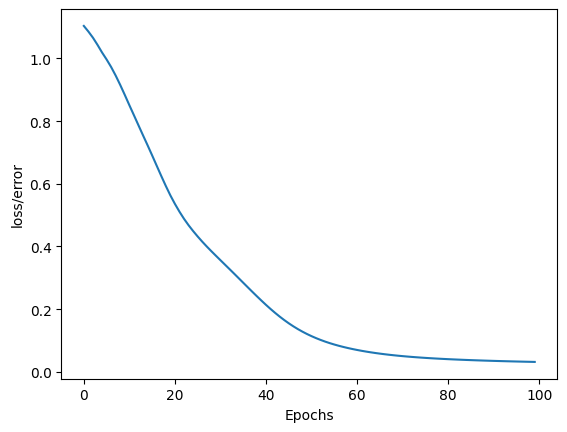

In [65]:
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("Epochs")